# SETA, SELIC and CDI - plotting, analysis

### Marcos Costa Santos Carreira - Jun 2017

## Importing Packages and setup

In [39]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
import matplotlib.patches as mpatches

## Loading the time series

In [2]:
path = '/Users/marcoscscarreira/Documents/XP2017/'
filename = 'STI-20170531113332729.csv'

In [132]:
BCBTSf=pd.read_table(path+filename, sep=";")

In [133]:
BCBTS=BCBTSf.copy().iloc[:-1]

In [134]:
BCBTS.columns=['Date','SETA','SELIC','CDI']

In [135]:
BCBTS['Date'] = pd.to_datetime(BCBTS['Date'].values, dayfirst=True)
BCBTS=BCBTS.replace("-",np.nan)
BCBTS.set_index(['Date'],inplace=True)
BCBTS['SETA']=BCBTS['SETA'].apply(np.float)
BCBTS['SELIC']=BCBTS['SELIC'].apply(np.float)
BCBTS['CDI']=BCBTS['CDI'].apply(np.float)

## Plots and changes

In [136]:
BCBTS.dropna(inplace=True)

In [137]:
BCBTSdiff=BCBTS.diff().dropna()

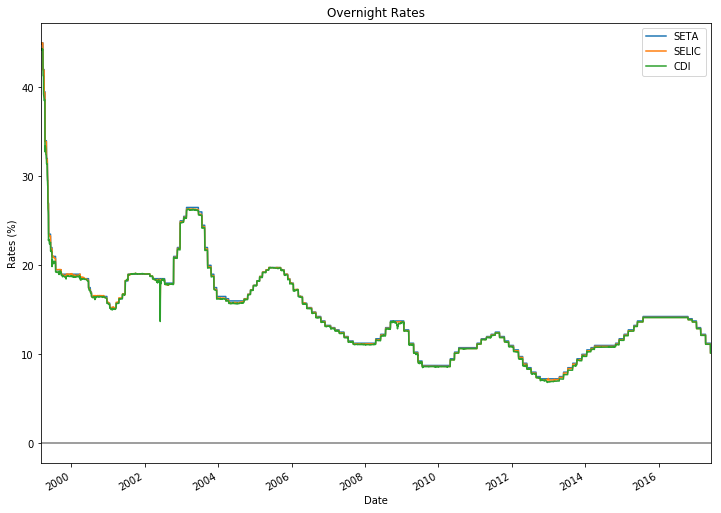

In [138]:
BCBTS.plot(figsize=(12,9),title='Overnight Rates');
plt.ylabel('Rates (%)');
plt.axhline(0,color='gray');

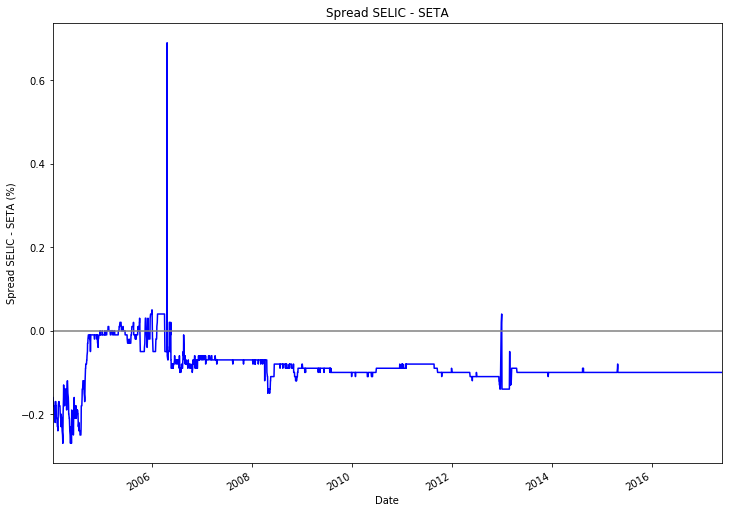

In [139]:
(BCBTS['SELIC']-BCBTS['SETA']).loc['2004':].plot(figsize=(12,9),
    color='blue',title='Spread SELIC - SETA');
plt.ylabel('Spread SELIC - SETA (%)');
plt.axhline(0,color='gray');

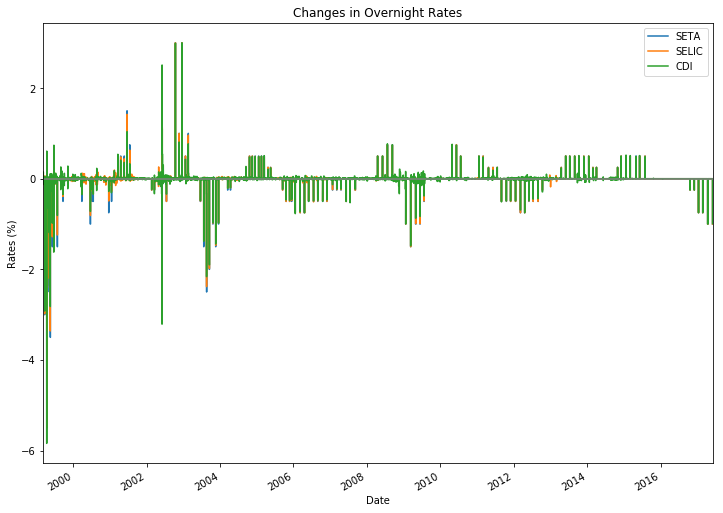

In [140]:
BCBTSdiff.plot(figsize=(12,9),title='Changes in Overnight Rates',drawstyle='steps-post');
plt.ylabel('Rates (%)');
plt.axhline(0,color='gray');

## Plots by BCB president

In [51]:
fraga=pd.date_range('1999-03-04','2002-12-31')
meirelles=pd.date_range('2003-01-01','2010-12-31')
tombini=pd.date_range('2011-01-01','2016-08-06')
goldfajn=pd.date_range('2016-08-07','2017-12-31')

### Fraga

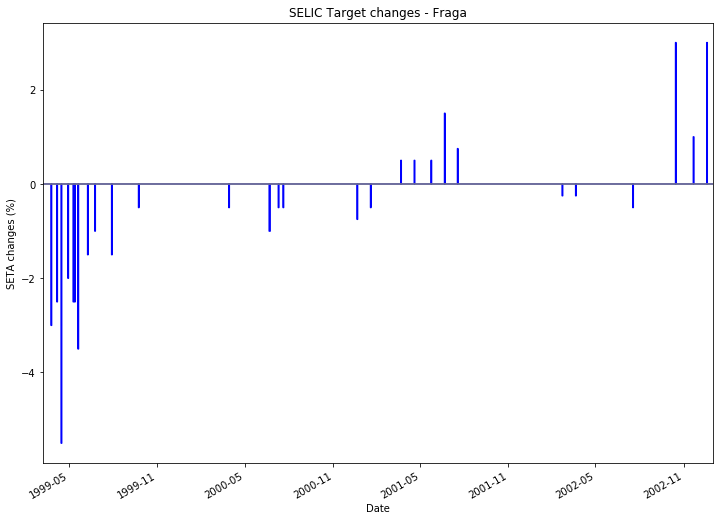

In [141]:
(BCBTSdiff['SETA'][BCBTSdiff.index.isin(fraga)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='SELIC Target changes - Fraga');
plt.ylabel('SETA changes (%)');
plt.axhline(0,color='gray');

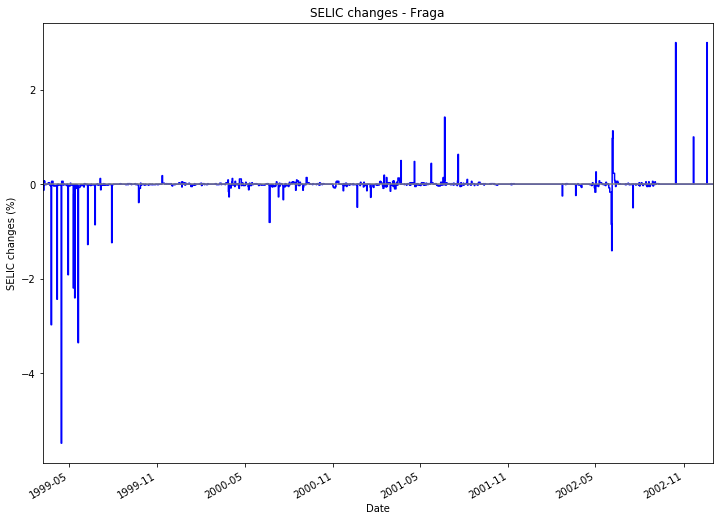

In [142]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(fraga)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='SELIC changes - Fraga');
plt.ylabel('SELIC changes (%)');
plt.axhline(0,color='gray');

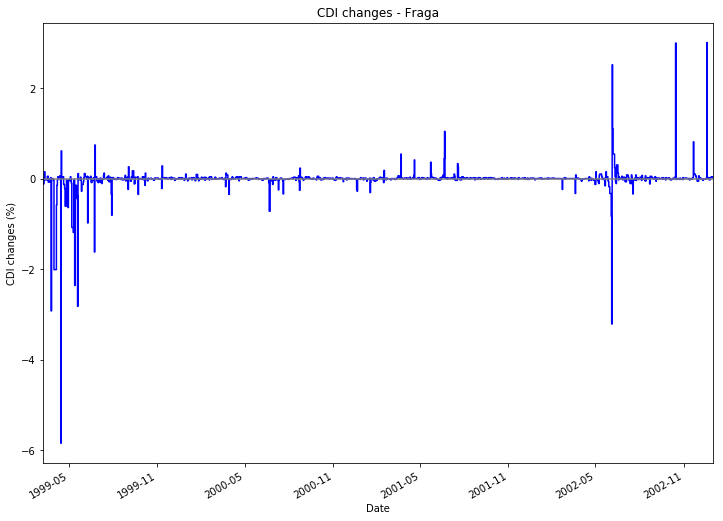

In [143]:
(BCBTSdiff['CDI'][BCBTSdiff.index.isin(fraga)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='CDI changes - Fraga');
plt.ylabel('CDI changes (%)');
plt.axhline(0,color='gray');

### Meirelles

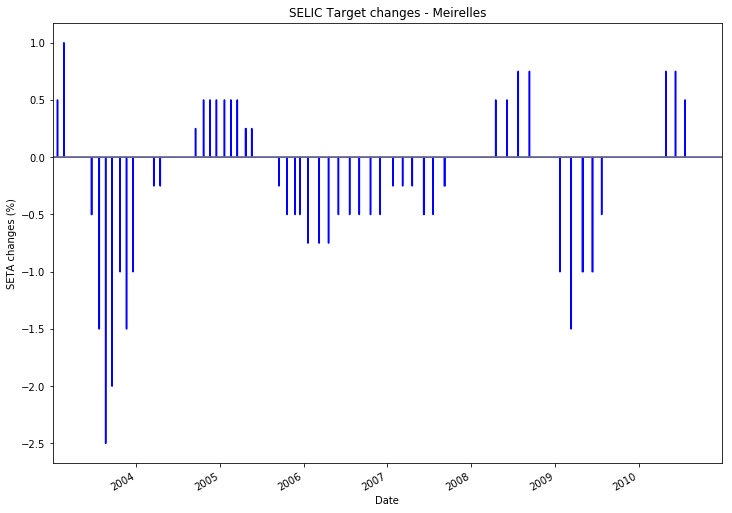

In [144]:
(BCBTSdiff['SETA'][BCBTSdiff.index.isin(meirelles)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='SELIC Target changes - Meirelles');
plt.ylabel('SETA changes (%)');
plt.axhline(0,color='gray');

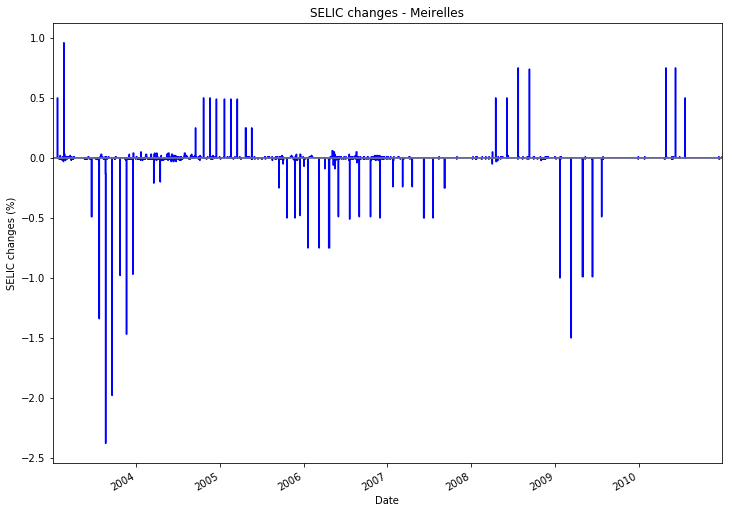

In [145]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(meirelles)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='SELIC changes - Meirelles');
plt.ylabel('SELIC changes (%)');
plt.axhline(0,color='gray');

How well the changes in SELIC match the changes in SETA?

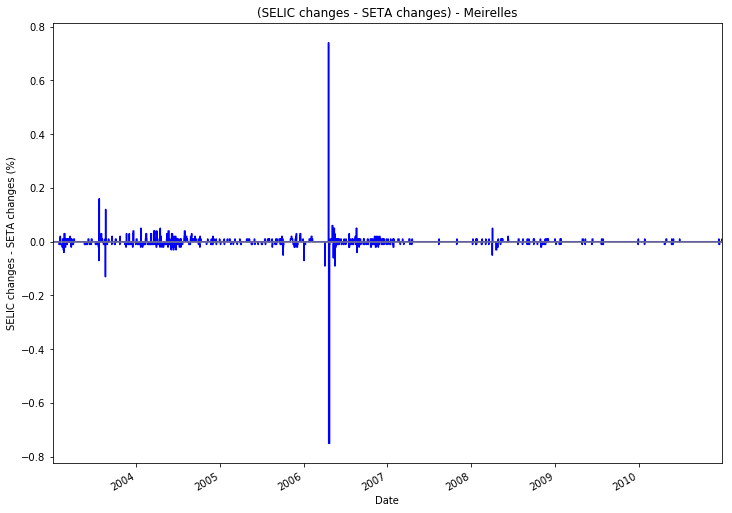

In [146]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(meirelles)]-
BCBTSdiff['SETA'][BCBTSdiff.index.isin(meirelles)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='(SELIC changes - SETA changes) - Meirelles');
plt.ylabel('SELIC changes - SETA changes (%)');
plt.axhline(0,color='gray');

What is going on? A bad idea - COPOM meeting decisions announced intraday

In [147]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(meirelles)]-
BCBTSdiff['SETA'][BCBTSdiff.index.isin(meirelles)]).loc['2006-04']

Date
2006-04-03   -0.09
2006-04-04    0.00
2006-04-05    0.00
2006-04-06    0.00
2006-04-07    0.00
2006-04-10    0.00
2006-04-11    0.00
2006-04-12    0.00
2006-04-13    0.00
2006-04-17    0.00
2006-04-18    0.00
2006-04-19    0.74
2006-04-20   -0.75
2006-04-24   -0.01
2006-04-25    0.00
2006-04-26    0.00
2006-04-27    0.01
2006-04-28    0.01
dtype: float64

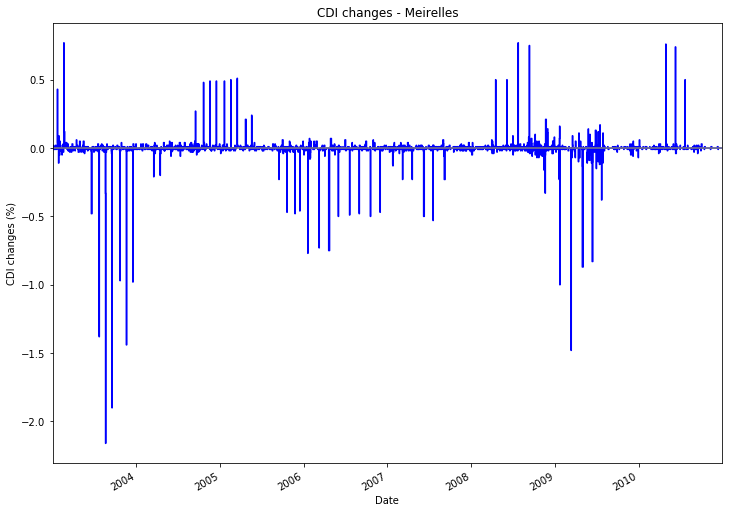

In [148]:
(BCBTSdiff['CDI'][BCBTSdiff.index.isin(meirelles)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='CDI changes - Meirelles');
plt.ylabel('CDI changes (%)');
plt.axhline(0,color='gray');

### Tombini

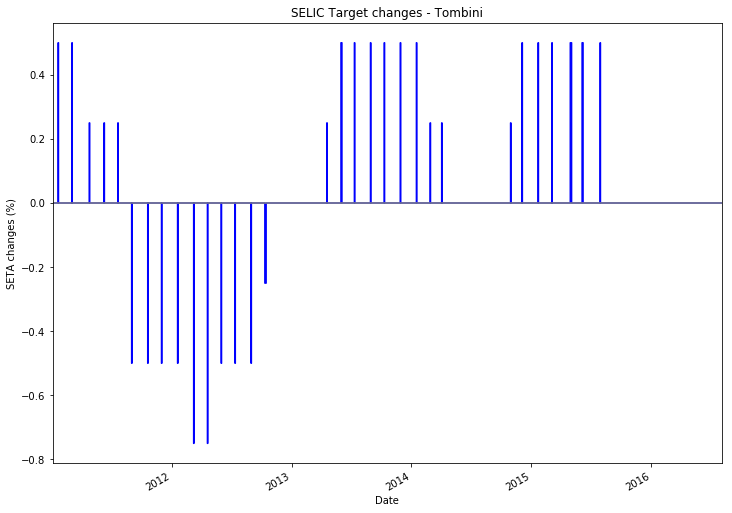

In [149]:
(BCBTSdiff['SETA'][BCBTSdiff.index.isin(tombini)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='SELIC Target changes - Tombini');
plt.ylabel('SETA changes (%)');
plt.axhline(0,color='gray');

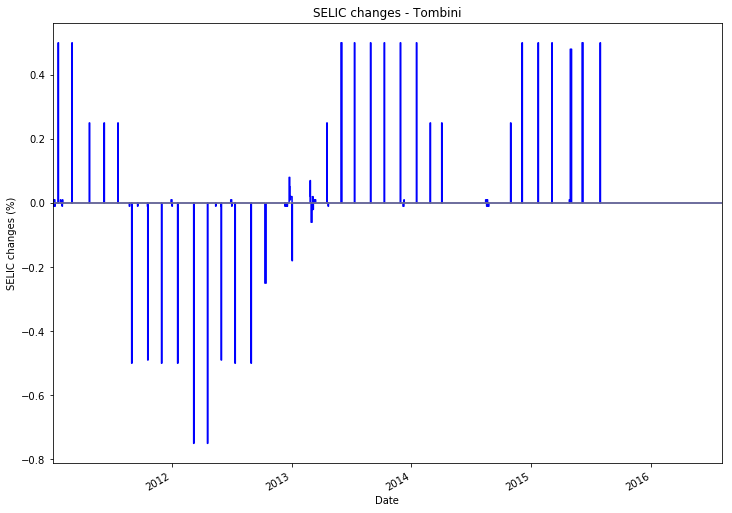

In [150]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(tombini)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='SELIC changes - Tombini');
plt.ylabel('SELIC changes (%)');
plt.axhline(0,color='gray');

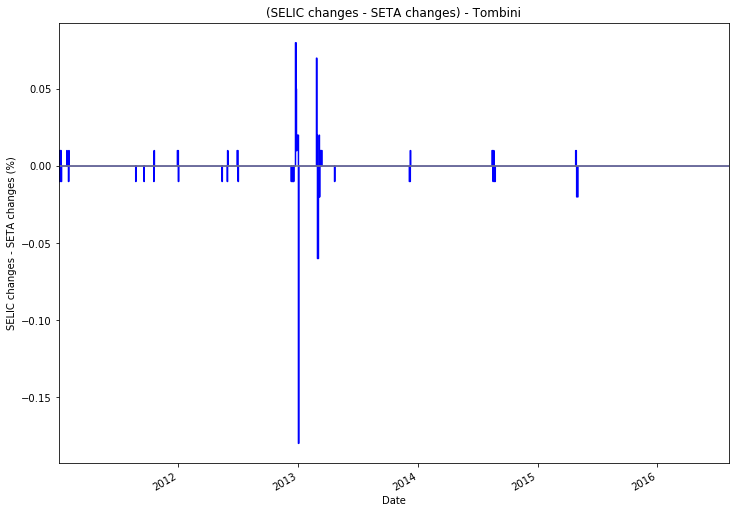

In [151]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(tombini)]-
BCBTSdiff['SETA'][BCBTSdiff.index.isin(tombini)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='(SELIC changes - SETA changes) - Tombini');
plt.ylabel('SELIC changes - SETA changes (%)');
plt.axhline(0,color='gray');

Liquidity issues at year-end

In [152]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(tombini)]-
BCBTSdiff['SETA'][BCBTSdiff.index.isin(tombini)]).loc['2012-12-24':'2013-01-05']

Date
2012-12-24    0.08
2012-12-26    0.05
2012-12-27    0.01
2012-12-28    0.02
2012-12-31    0.02
2013-01-02   -0.18
2013-01-03    0.00
2013-01-04    0.00
dtype: float64

In [153]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(tombini)]-
BCBTSdiff['SETA'][BCBTSdiff.index.isin(tombini)]).loc['2013-02-25':'2013-03-04']

Date
2013-02-25    0.00
2013-02-26    0.07
2013-02-27    0.02
2013-02-28    0.00
2013-03-01   -0.06
2013-03-04   -0.02
dtype: float64

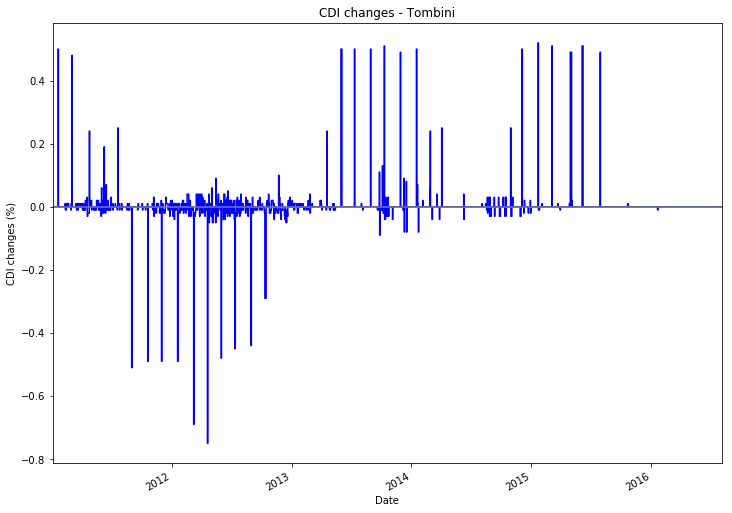

In [154]:
(BCBTSdiff['CDI'][BCBTSdiff.index.isin(tombini)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='CDI changes - Tombini');
plt.ylabel('CDI changes (%)');
plt.axhline(0,color='gray');

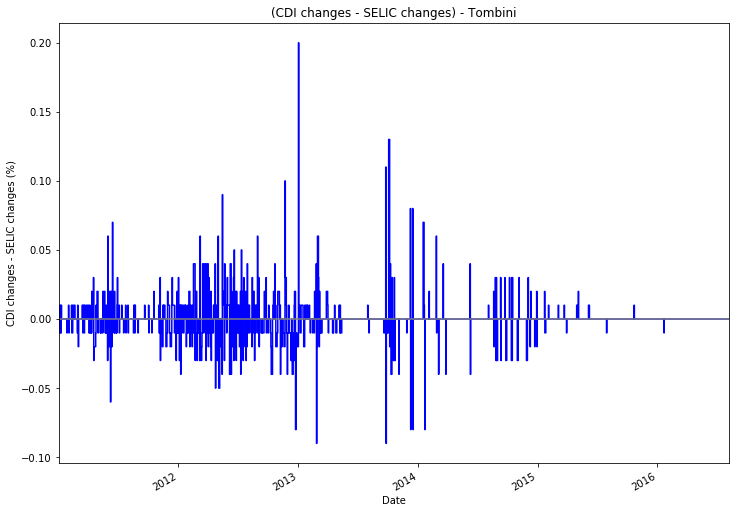

In [155]:
(BCBTSdiff['CDI'][BCBTSdiff.index.isin(tombini)]-
BCBTSdiff['SELIC'][BCBTSdiff.index.isin(tombini)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='(CDI changes - SELIC changes) - Tombini');
plt.ylabel('CDI changes - SELIC changes (%)');
plt.axhline(0,color='gray');

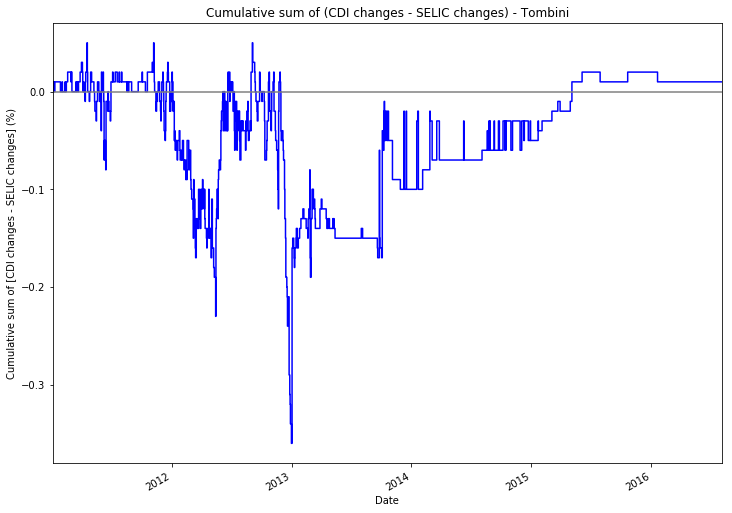

In [156]:
(BCBTSdiff['CDI'][BCBTSdiff.index.isin(tombini)]-
BCBTSdiff['SELIC'][BCBTSdiff.index.isin(tombini)]).cumsum().plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='Cumulative sum of (CDI changes - SELIC changes) - Tombini');
plt.ylabel('Cumulative sum of [CDI changes - SELIC changes] (%)');
plt.axhline(0,color='gray');

### Goldfajn

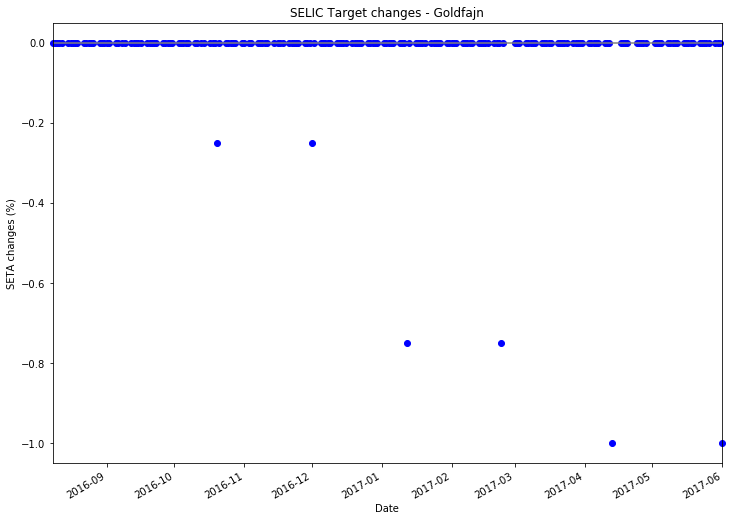

In [159]:
(BCBTSdiff['SETA'][BCBTSdiff.index.isin(goldfajn)]).plot(figsize=(12,9),
    linestyle='None',marker='o',color='blue',clip_on=False,
    title='SELIC Target changes - Goldfajn');
plt.ylabel('SETA changes (%)');
plt.axhline(0,color='gray');

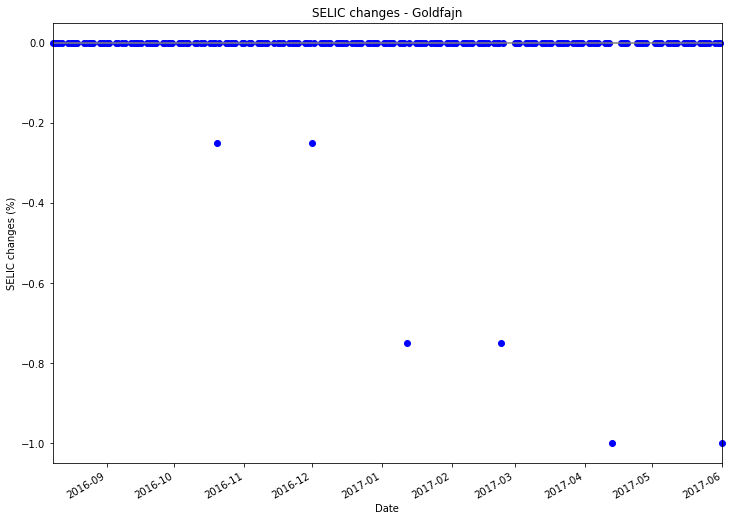

In [160]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(goldfajn)]).plot(figsize=(12,9),
    linestyle='None',marker='o',color='blue',clip_on=False,
    title='SELIC changes - Goldfajn');
plt.ylabel('SELIC changes (%)');
plt.axhline(0,color='gray');

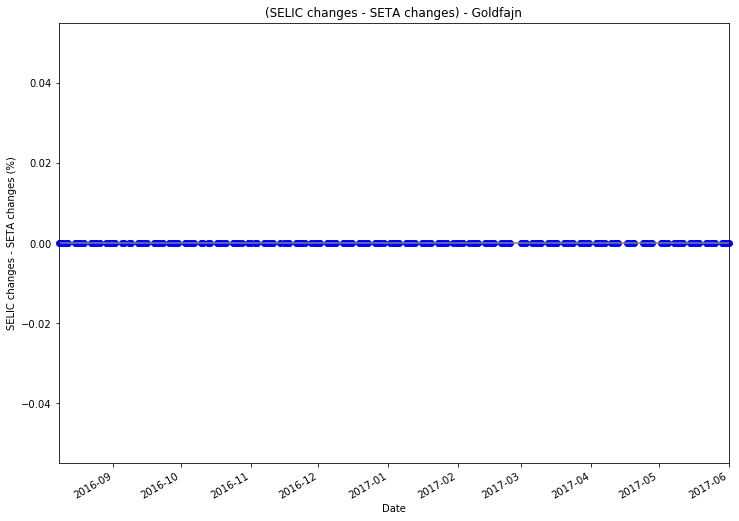

In [161]:
(BCBTSdiff['SELIC'][BCBTSdiff.index.isin(goldfajn)]-
BCBTSdiff['SETA'][BCBTSdiff.index.isin(goldfajn)]).plot(figsize=(12,9),
    linestyle='None',marker='o',color='blue',clip_on=False,
    title='(SELIC changes - SETA changes) - Goldfajn');
plt.ylabel('SELIC changes - SETA changes (%)');
plt.axhline(0,color='gray');

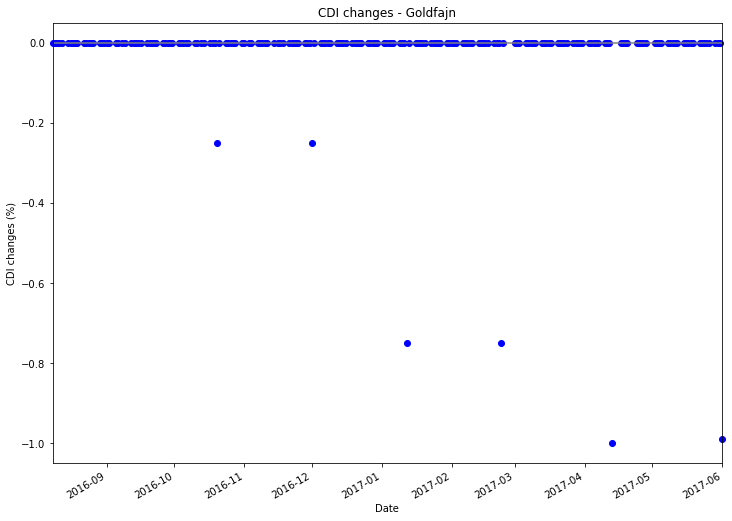

In [162]:
(BCBTSdiff['CDI'][BCBTSdiff.index.isin(goldfajn)]).plot(figsize=(12,9),
    linestyle='None',marker='o',color='blue',clip_on=False,
    title='CDI changes - Goldfajn');
plt.ylabel('CDI changes (%)');
plt.axhline(0,color='gray');

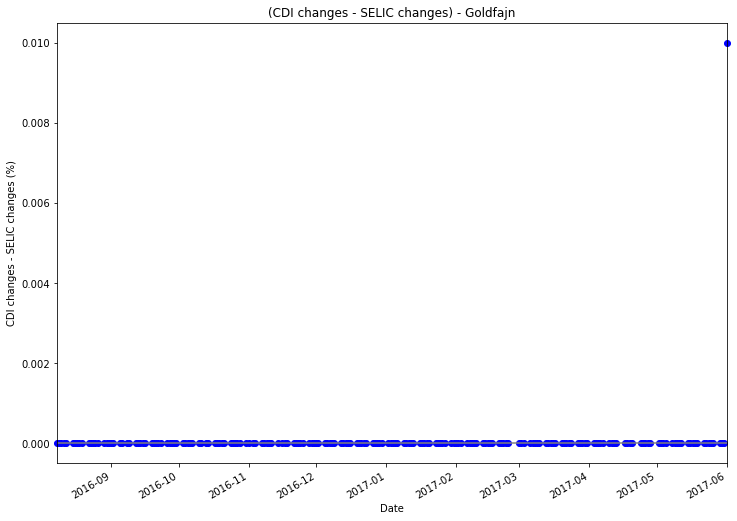

In [163]:
(BCBTSdiff['CDI'][BCBTSdiff.index.isin(goldfajn)]-
BCBTSdiff['SELIC'][BCBTSdiff.index.isin(goldfajn)]).plot(figsize=(12,9),
    linestyle='None',marker='o',color='blue',clip_on=False,
    title='(CDI changes - SELIC changes) - Goldfajn');
plt.ylabel('CDI changes - SELIC changes (%)');
plt.axhline(0,color='gray');

## Spread CDI - SELIC

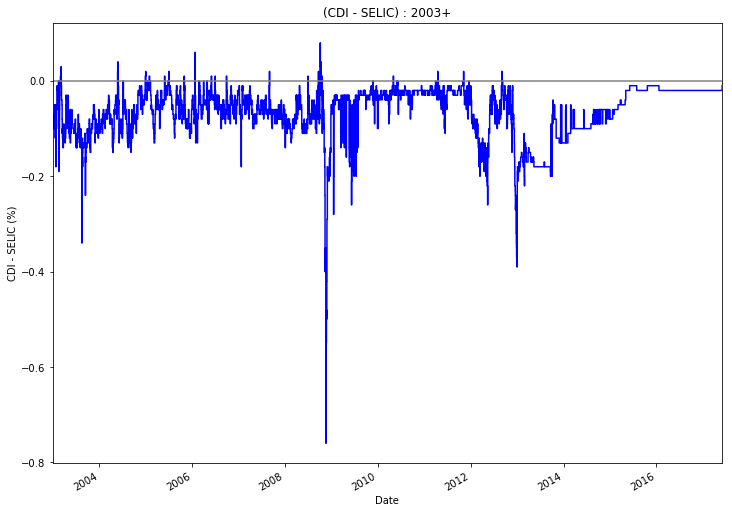

In [164]:
(BCBTS['CDI'][~BCBTS.index.isin(fraga)]-
BCBTS['SELIC'][~BCBTS.index.isin(fraga)]).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='(CDI - SELIC) : 2003+');
plt.ylabel('CDI - SELIC (%)');
plt.axhline(0,color='gray');

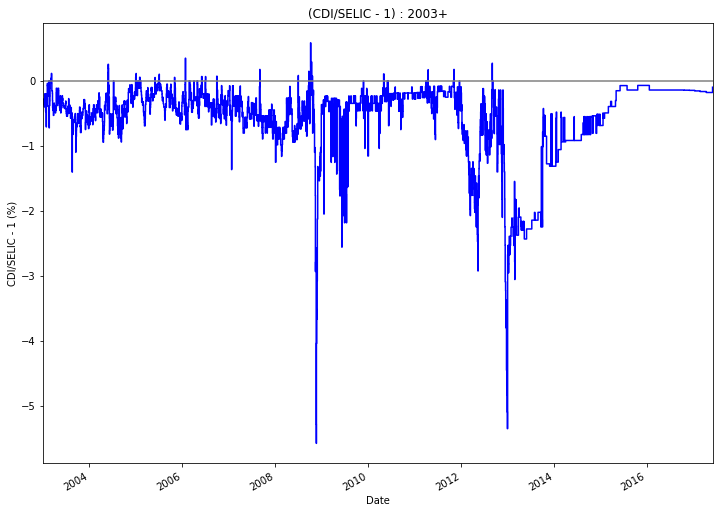

In [165]:
(100*(BCBTS['CDI'][~BCBTS.index.isin(fraga)]/
BCBTS['SELIC'][~BCBTS.index.isin(fraga)]-1)).plot(figsize=(12,9),
    drawstyle='steps-post',color='blue',
    title='(CDI/SELIC - 1) : 2003+');
plt.ylabel('CDI/SELIC - 1 (%)');
plt.axhline(0,color='gray');

## What has happened to the CDI?

In [92]:
filename2 = 'CDICETIP.xlsx'

In [102]:
CETIPf = pd.ExcelFile(path+filename2).parse('Sheet1')

In [103]:
CETIPf.columns=['Date','#Trades','Volume','Avg','Min','Max','Mode','StdDev','SELIC']
CETIP=CETIPf.set_index('Date')

In [104]:
CETIP['Spread']=CETIP['Avg']-CETIP['SELIC']

In [105]:
CETIP['FB']=CETIP['#Trades']<10

In [106]:
CETIP.head()

,#Trades,Volume,Avg,Min,Max,Mode,StdDev,SELIC,Spread,FB
Date,,,,,,,,,,
1998-01-02,223,2059968.0,38.11,35.85,39.9,37.57,0.46,35.76,2.35,False
1998-01-05,248,2201479.0,38.06,35.85,39.32,37.57,0.41,37.49,0.57,False
1998-01-06,255,2376583.0,38.07,35.85,39.32,38.04,0.32,37.94,0.13,False
1998-01-07,253,2103906.0,38.09,35.85,39.32,37.92,0.39,38.07,0.02,False
1998-01-08,267,2080747.0,38.10,35.29,39.32,38.04,0.43,38.04,0.06,False


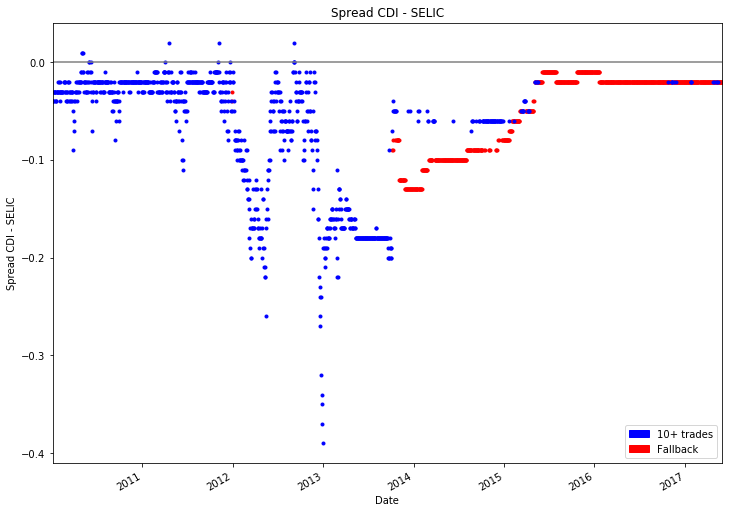

In [127]:
CETIP[CETIP['FB']]['Spread'].loc['2010':].plot(figsize=(12,9),
    marker='.',color='red',linestyle='None');
CETIP[~CETIP['FB']]['Spread'].loc['2010':].plot(figsize=(12,9),
    marker='.',color='blue',linestyle='None');
plt.axhline(0,color='gray');
plt.ylabel('Spread CDI - SELIC');
plt.title('Spread CDI - SELIC');
red_patch = mpatches.Patch(color='red', label='Fallback');
blue_patch = mpatches.Patch(color='blue', label='10+ trades');
plt.legend(handles=[blue_patch,red_patch], loc='lower right');

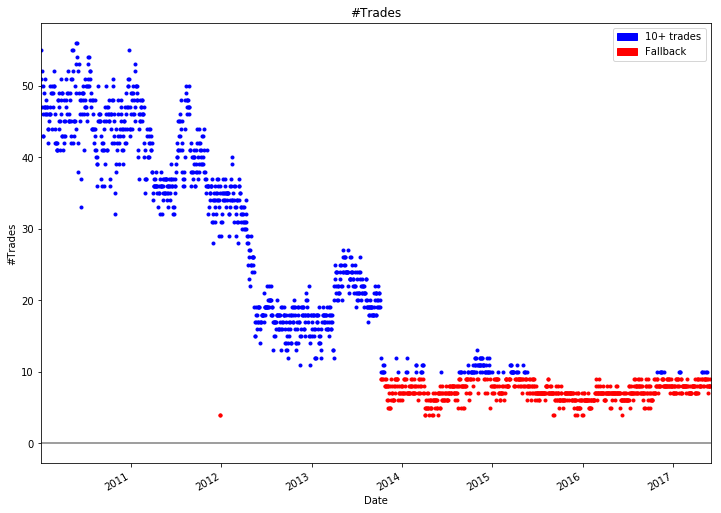

In [128]:
CETIP[CETIP['FB']]['#Trades'].loc['2010':].plot(figsize=(12,9),
    marker='.',color='red',linestyle='None');
CETIP[~CETIP['FB']]['#Trades'].loc['2010':].plot(figsize=(12,9),
    marker='.',color='blue',linestyle='None');
plt.axhline(0,color='gray');
plt.ylabel('#Trades');
plt.title('#Trades');
red_patch = mpatches.Patch(color='red', label='Fallback');
blue_patch = mpatches.Patch(color='blue', label='10+ trades');
plt.legend(handles=[blue_patch,red_patch], loc='upper right');